# Metric estimation and plotting

## WMH

In [3]:
!python metric_estimation.py /home/fmatzkin/Code/Orthogonal_Ensemble_Networks/orth-ens-net/datasets/wmh/config_pc10.ini

2022-03-22 12:46:34.316033: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Testing models
/home/fmatzkin/Code/Orthogonal_Ensemble_Networks/OEN/results_ho/wmh_ResUNet_inter-orthogonal_selfp_0.1_interp_0.1/models already contains files. Run metric_estimation with --overwrite for computing the metrics again.
Testing ensembles
/home/fmatzkin/Code/Orthogonal_Ensemble_Networks/OEN/results_ho/wmh_ResUNet_inter-orthogonal_selfp_0.1_interp_0.1/ensembles already contains files. Run metric_estimation with --overwrite for computing the metrics again.
Testing ensembles
/home/fmatzkin/Code/Orthogonal_Ensemble_Networks/OEN/results_ho/wmh_ResUNet_inter-orthogonal_selfp_0.1_interp_0.1/ensembles already contains files. Run metric_estimation with --overwrite for computing the metrics again.


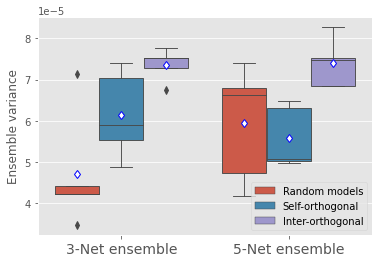

In [9]:
save_results_fold='./diagramas/'
import matplotlib.style as style

model_folds_wmh=  ['ResUNet-random','ResUNet-self-orthogonal','ResUNet-inter-orthogonal']

model_names=['ensemble_3','ensemble_5']

data_for_boxplot_wmh= getDataForBoxplot_wmh_variance(model_folds_wmh,model_names)

style.available
style.use('ggplot')

f, axes = plt.subplots(1, 1,figsize=(6,4))


#sns.set(style="whitegrid")
#sns.set_palette("muted")

sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplot_wmh[(data_for_boxplot_wmh['metric'] == "variance")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes)
#axes.set_title('Ensemble variance',fontsize=16)



#f.suptitle("Dice Coefficient",size=16)
for i in range(1):
    #axes[i].set_ylim(0.66,0.80)

    axes.set(xlabel=None)
    axes.set(ylabel='Ensemble variance')
    axes.set_xticklabels(['3-Net ensemble', '5-Net ensemble'],fontsize=14)
    axes.ticklabel_format(axis='y', style='sci',scilimits=(-2,2))


#axes[0].set(ylabel='Hausdorff Distance')
#axes[1].set(yticklabels=[])

# check axes and find which is have legend
leg = axes.get_legend()
leg.set_title([])
new_labels = ['Random models', 'Self-orthogonal','Inter-orthogonal']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.subplots_adjust(wspace=0.15)
plt.savefig('wmh_ensemble_variance.pdf',bbox_inches='tight',dpi=600)

## Ensemble variance 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

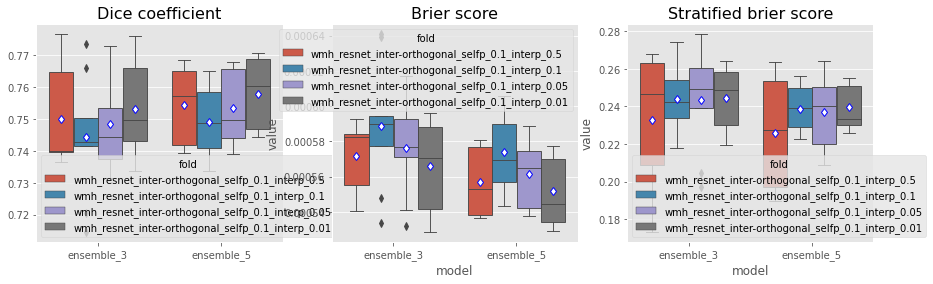

In [13]:
save_results_fold='./diagramas/'
import matplotlib.style as style
model_folds_wmh=  ['ResUNet-random','ResUNet-self-orthogonal','ResUNet-inter-orthogonal']
model_names=['ensemble_3','ensemble_5']

model_folds_wmh=  ['wmh_resnet_inter-orthogonal_selfp_0.1_interp_0.5',\
               'wmh_resnet_inter-orthogonal_selfp_0.1_interp_0.1',\
                'wmh_resnet_inter-orthogonal_selfp_0.1_interp_0.05',\
               'wmh_resnet_inter-orthogonal_selfp_0.1_interp_0.01']

data_for_boxplot_wmh= getDataForBoxplot_wmh(model_folds_wmh,model_names)
style.available
style.use('ggplot')

f, axes = plt.subplots(1, 3,figsize=(15,4))


#sns.set(style="whitegrid")
#sns.set_palette("muted")

sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplot_wmh[(data_for_boxplot_wmh['metric'] == "dice")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[0])
axes[0].set_title('Dice coefficient',fontsize=16)


sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplot_wmh[(data_for_boxplot_wmh['metric'] == "brier")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[1])
axes[1].set_title('Brier score',fontsize=16)

sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplot_wmh[(data_for_boxplot_wmh['metric'] == "brier_plus")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[2])
axes[2].set_title('Stratified brier score',fontsize=16)


#f.suptitle("Dice Coefficient",size=16)
for i in range(3):
    #axes[i].set_ylim(0.66,0.80)

    axes[i].set(xlabel=None)
    axes[i].set(ylabel=None)
    axes[i].set_xticklabels(['1-Network', '3-Net ensemble','5-Net ensemble'],Rotation = 30,fontsize=14)
    axes[i].ticklabel_format(axis='y', style='sci',scilimits=(-2,2))
#axes[0].set(ylabel='Hausdorff Distance')    
#axes[1].set(yticklabels=[])

for i in range(2):
    axes[i].legend_.remove()
# check axes and find which is have legend
leg = axes[2].get_legend()
leg.set_title([])
new_labels = ['Random models', 'Self-orthogonal','Inter-orthogonal']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.subplots_adjust(wspace=0.15)
plt.savefig('wmh_MICCAI_BOXPLOT_formato2.png',bbox_inches='tight')

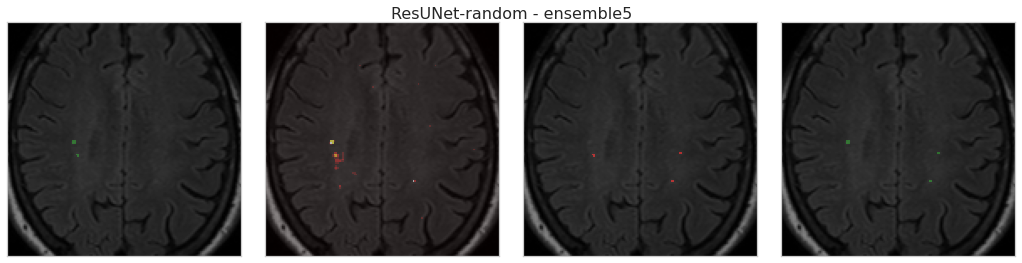

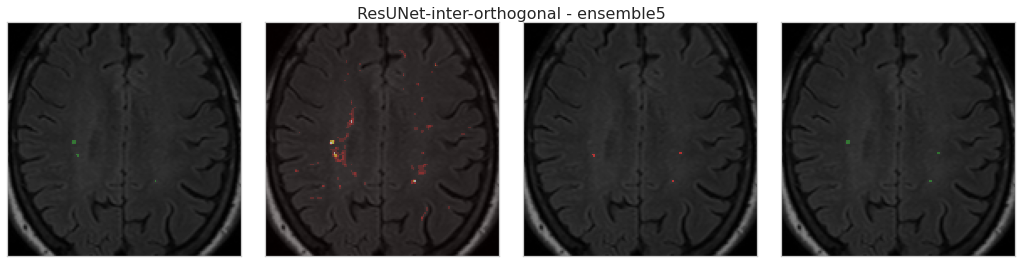

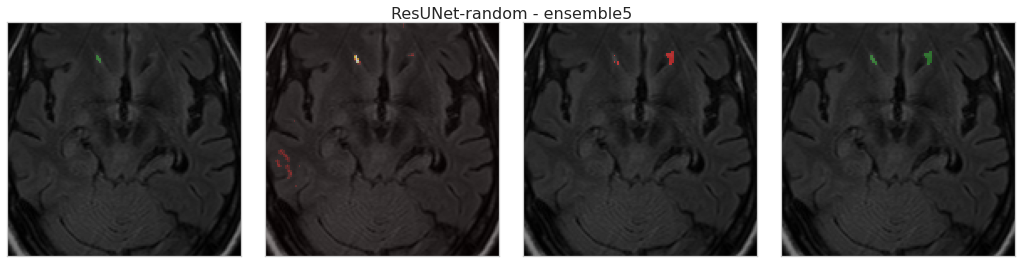

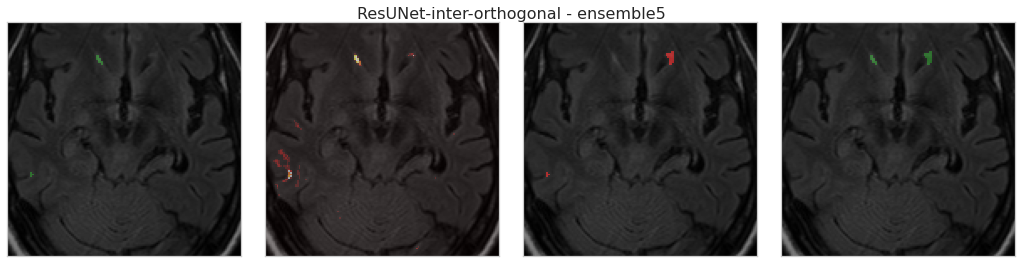

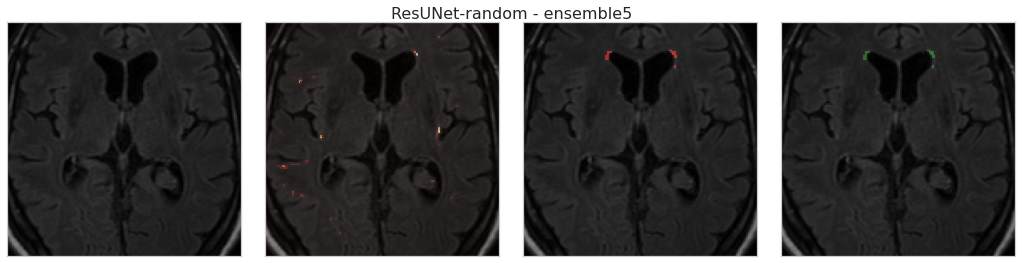

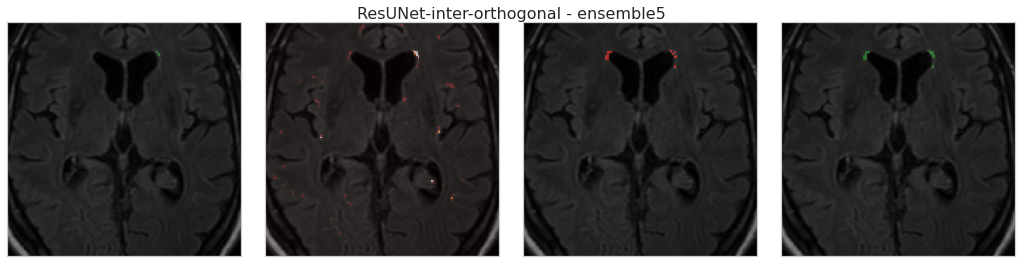

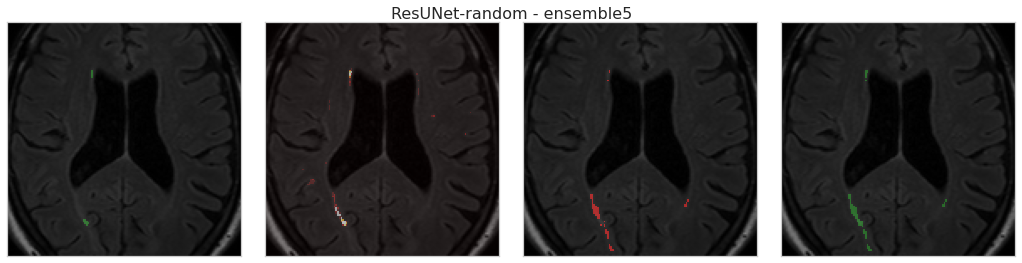

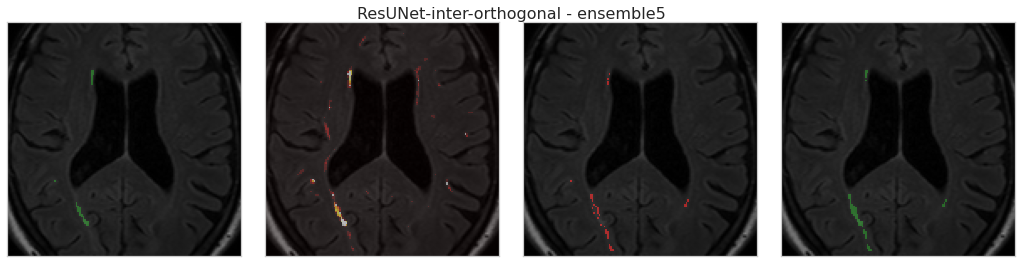

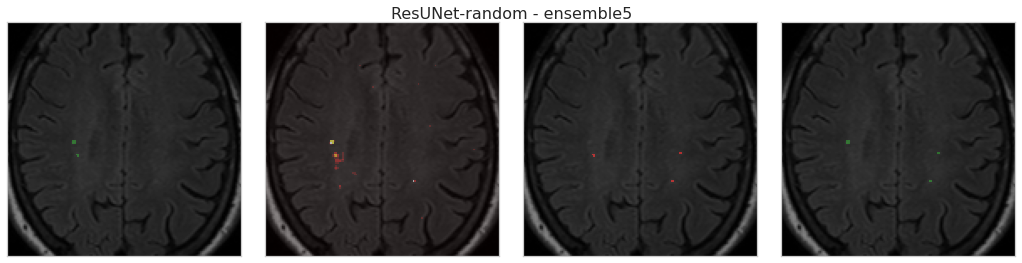

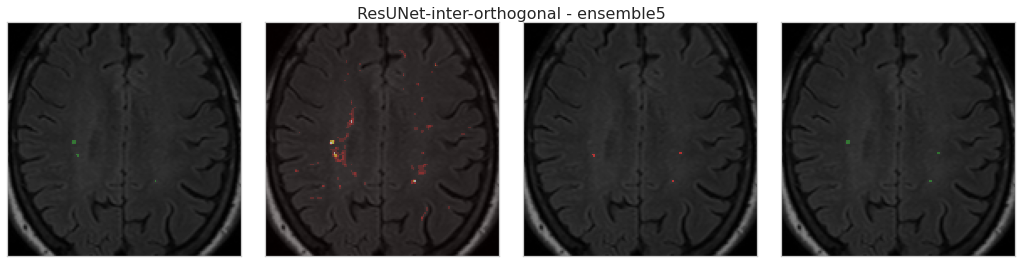

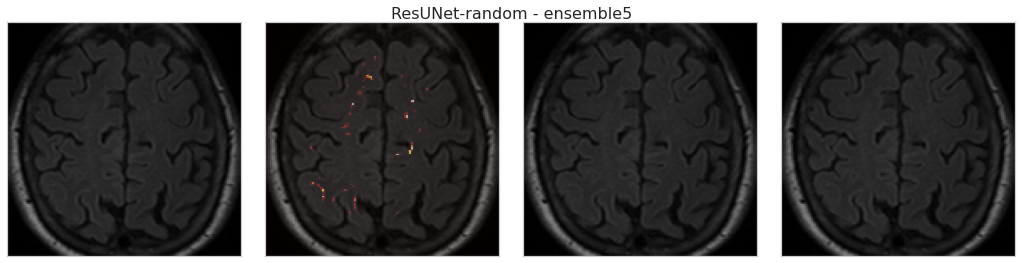

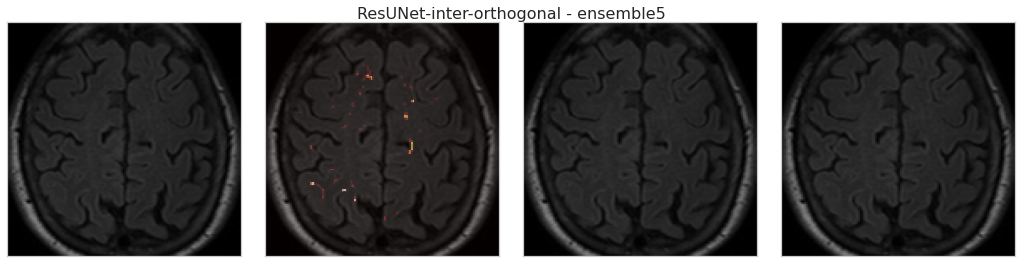

In [5]:
import matplotlib.style as style
import numpy as np
from matplotlib.colors import ListedColormap
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    color_list = base([0.  ,0.1, 0.2, 0.3 ,0,4, 0.5,0.6, 0.7,0.8,0.9,1.  ])
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


sns.set(style="whitegrid")
sns.set_palette("muted")
col_dict={0:'black',
          1:"red"
          }
# We create a colormar from our list of colors
cm_error = ListedColormap([col_dict[x] for x in col_dict.keys()])
col_dict={0:'black',
          1:"green"
          }
cm_seg = ListedColormap([col_dict[x] for x in col_dict.keys()])

styles_dict = {
     'mask':{'file':'wmh_mask.nii.gz','color':cm_seg},
     'probabilities':{'file':'wmh.nii.gz','color':discrete_cmap(N=10,base_cmap='hot')},
     'error':{'file':'wmh_mask.nii.gz','color':cm_error}
}

def show_images(model_fold,model_name,k,plots_names):
    fig, axes = plt.subplots(1, len(plots_names)+1,figsize=(15,4),tight_layout=True)
    mask = nib.load(os.path.join(folder,image,model_fold,model_name,styles_dict['mask']['file'])).get_fdata()
    mask = mask
    prob=nib.load(os.path.join(folder,image,model_fold,model_name,styles_dict['probabilities']['file'])).get_fdata()
    prob = prob
    data = nib.load(os.path.join('./test_data',image,'orig','FLAIR.nii.gz'))
    data = data.get_fdata()
    gt = nib.load(os.path.join('./test_data',image,'wmh.nii.gz'))
    gt = gt.get_fdata()
    gt = gt
    error=np.abs(mask-gt)

    for i, plots_name in enumerate(plots_names):

            axes[i].imshow(data[box:-box,box:-box,k].transpose(),cmap='gray')
            axes[i].grid(False)
            axes[i].set_xticks([])
            axes[i].set_yticks([])


    axes[0].imshow(mask[box:-box,box:-box,k].transpose(), cmap=styles_dict['mask']['color'], interpolation='none', alpha=0.5)
    axes[1].imshow(prob[box:-box,box:-box,k].transpose(), cmap=styles_dict['probabilities']['color'], interpolation='none', alpha=0.5)
    axes[2].imshow(error[box:-box,box:-box,k].transpose(), cmap=styles_dict['error']['color'], interpolation='none', alpha=0.5)


    axes[len(plots_names)].imshow(data[box:-box,box:-box,k].transpose(),cmap='gray')
    axes[len(plots_names)].imshow(gt[box:-box,box:-box,k].transpose(), cmap=cm_seg, interpolation='none', alpha=0.5)
    #axes[len(model_names)+1].set_title('GT')   
    axes[len(plots_names)].set_xticks([])
    axes[len(plots_names)].set_yticks([])
    plt.suptitle(model_fold + ' - '+model_name, fontsize=16,y=0.91)
    plt.savefig('./images_visualization/img_'+image +str(k)+model_fold+'.png',bbox_inches='tight',dpi=600)

    plt.show()
folder='./ensemble_preds'
model_name='ensemble5'
image='6'
box=50
k=30
plots_names=['mask','probabilities','error']

model_fold='ResUNet-random'
show_images(model_fold,model_name,k,plots_names)


model_fold='ResUNet-inter-orthogonal'
show_images(model_fold,model_name,k,plots_names)


for k in [ 15,20,25,30, 35]:
    model_fold='ResUNet-random'
    show_images(model_fold,model_name,k,plots_names)

    model_fold='ResUNet-inter-orthogonal'
    show_images(model_fold,model_name,k,plots_names)


# Brats

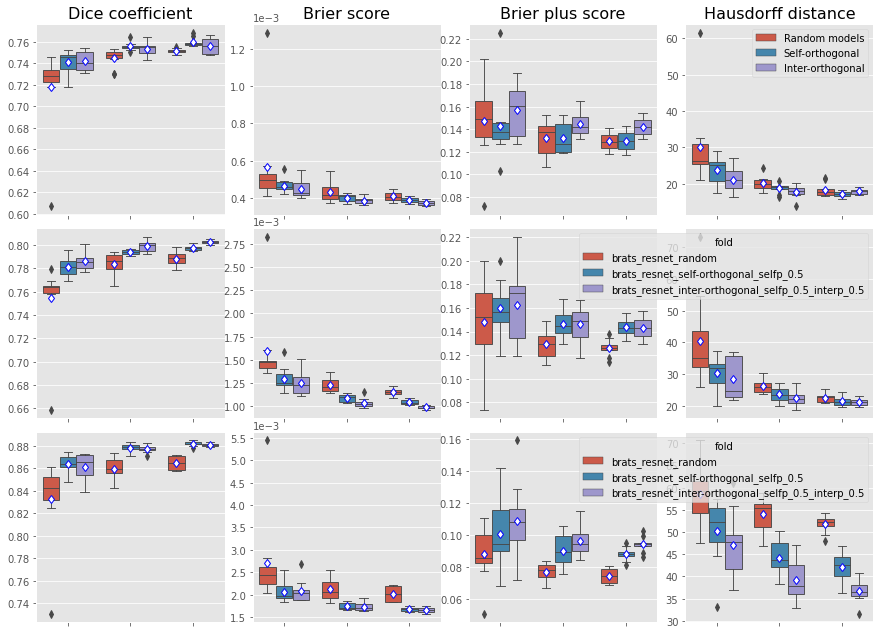

In [7]:
save_results_fold='./diagramas/'
import matplotlib.style as style
import matplotlib.gridspec as gridspec

style.available
style.use('ggplot')
f, axes = plt.subplots(3, 4,figsize=(15,11))


tumor_region=['ET','TC','WT']
for i in range(3):


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_Brats[(data_for_boxplots_Brats['metric'] == "dice") &(data_for_boxplots_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,0])

    axes[0,0].set_title('Dice coefficient',fontsize=16)


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_Brats[(data_for_boxplots_Brats['metric'] == "brier") &(data_for_boxplots_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,1])


    axes[0,1].set_title('Brier score',fontsize=16)


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_Brats[(data_for_boxplots_Brats['metric'] == "brier_plus")&(data_for_boxplots_Brats['tumor region'] ==  tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,2])

    axes[0,2].set_title('Brier plus score',fontsize=16)

    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_Brats[(data_for_boxplots_Brats['metric'] == "hd") &(data_for_boxplots_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,3])
    axes[0,3].set_title('Hausdorff distance',fontsize=16)



    if i==0:
        for j in range(3):
            axes[i,j].legend_.remove()

        # check axes and find which is have legend
        leg = axes[0,3].get_legend()
        leg.set_title([])
        new_labels = ['Random models', 'Self-orthogonal','Inter-orthogonal']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
    else:
        for j in range(3):
            axes[i,j].legend_.remove()


    for j in range(4):


        axes[i,j].set(xlabel=None)
        axes[i,j].set(ylabel=None)
        if i==3:
            axes[i,j].set_xticklabels(['1-Network', '3-Net ensemble','5-Net ensemble'],Rotation = 30,fontsize=14)
        else:
            axes[i,j].set(xticklabels=[])
        axes[i,j].ticklabel_format(axis='y', style='sci',scilimits=(-2,2))


plt.subplots_adjust(wspace=0.15, hspace=0.07)
plt.savefig('Brats_MICCAI_BOXPLOT_formato2.pdf',bbox_inches='tight')




# Brats original classes

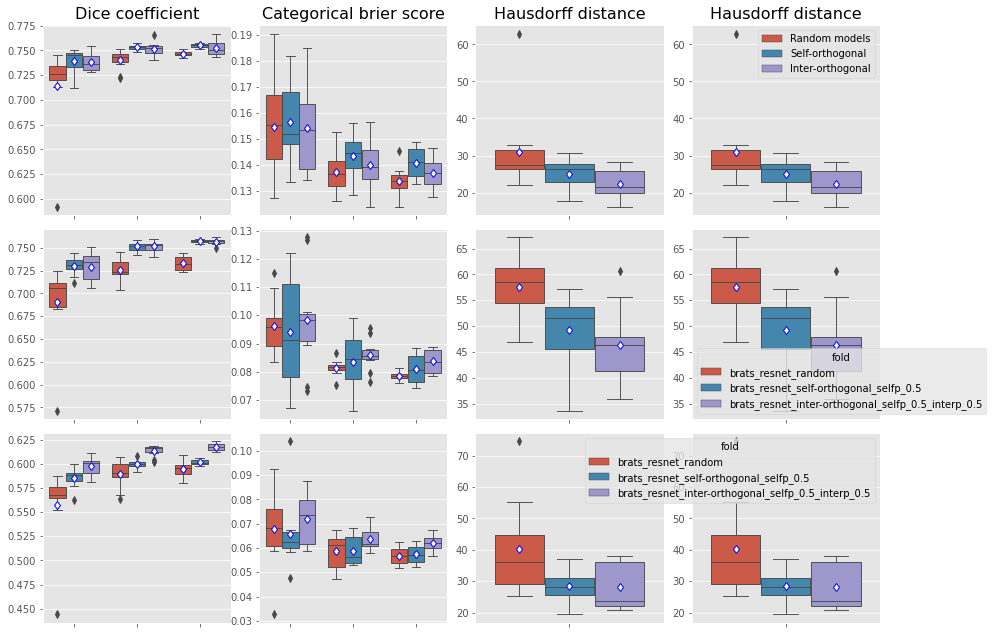

In [8]:
save_results_fold='./diagramas/'
import matplotlib.style as style
import matplotlib.gridspec as gridspec

style.available
style.use('ggplot')
f, axes = plt.subplots(3, 4,figsize=(15,11))
#gs1 = gridspec.GridSpec(3, 3)
#gs1.update(wspace=0.025, hspace=0.0) 

tumor_region=['ET','edema','NET']
for i in range(3):


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_classes_Brats[(data_for_boxplots_classes_Brats['metric'] == "dice_classes") &(data_for_boxplots_classes_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,0])

    axes[0,0].set_title('Dice coefficient',fontsize=16)


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_classes_Brats[(data_for_boxplots_classes_Brats['metric'] == "categorical_brier") &(data_for_boxplots_classes_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,1])


    axes[0,1].set_title('Categorical brier score',fontsize=16)


    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_classes_Brats[(data_for_boxplots_classes_Brats['metric'] == "hd_classes")&(data_for_boxplots_classes_Brats['tumor region'] ==  tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,2])

    axes[0,2].set_title('Hausdorff distance',fontsize=16)

    sns.boxplot(x="model", y="value",
                hue="fold", data=data_for_boxplots_classes_Brats[(data_for_boxplots_classes_Brats['metric'] == "hd_classes") &(data_for_boxplots_classes_Brats['tumor region'] == tumor_region[i])],linewidth=0.9,showmeans=True,
                meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[i,3])
    axes[0,3].set_title('Hausdorff distance',fontsize=16)



    if i==0:
        for j in range(3):
            axes[i,j].legend_.remove()

        # check axes and find which is have legend
        leg = axes[0,3].get_legend()
        leg.set_title([])
        new_labels = ['Random models', 'Self-orthogonal','Inter-orthogonal']
        for t, l in zip(leg.texts, new_labels): t.set_text(l)
    else:
        for j in range(3):
            axes[i,j].legend_.remove()


    for j in range(4):


        axes[i,j].set(xlabel=None)
        axes[i,j].set(ylabel=None)
        if i==3:
            axes[i,j].set_xticklabels(['1-Network', '3-Net ensemble','5-Net ensemble'],Rotation = 30,fontsize=14)
        else:
            axes[i,j].set(xticklabels=[])
        axes[i,j].ticklabel_format(axis='y', style='sci',scilimits=(-2,2))


plt.subplots_adjust(wspace=0.15, hspace=0.07)
plt.savefig('Brats_boxplot.pdf',bbox_inches='tight')




#  Brats análisis multiclases

Text(0.5, 1.0, 'Multiclass brier score')

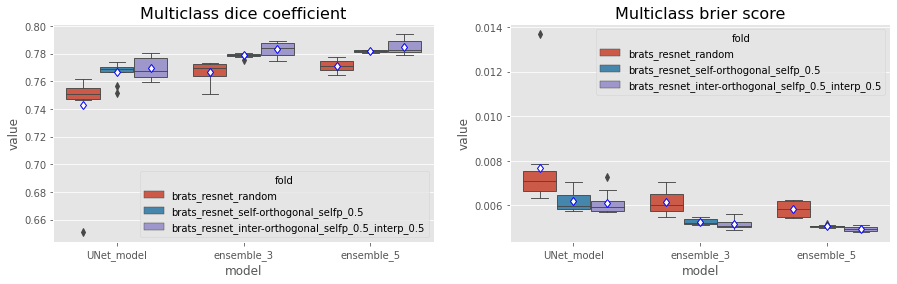

In [9]:
save_results_fold='./diagramas/'
import matplotlib.style as style

style.available
style.use('ggplot')

f, axes = plt.subplots(1, 2,figsize=(15,4))


#sns.set(style="whitegrid")
#sns.set_palette("muted")

sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplots_MC_Brats[(data_for_boxplots_MC_Brats['metric'] == "multiclass_dice")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[0])

axes[0].set_title('Multiclass dice coefficient',fontsize=16)



sns.boxplot(x="model", y="value",
            hue="fold", data=data_for_boxplots_MC_Brats[(data_for_boxplots_MC_Brats['metric'] == "multiclass_brier")],linewidth=0.9,showmeans=True,
            meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"},ax=axes[1])

axes[1].set_title('Multiclass brier score',fontsize=16)
